In [119]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img_pg0 = cv2.imread("/content/Pg0.jpg", cv2.IMREAD_COLOR)
img_pg5 = cv2.imread("/content/Pg5.jpg", cv2.IMREAD_COLOR)
img_fruit = cv2.imread("/content/fruit.jpg", cv2.IMREAD_COLOR)
img_mal = cv2.imread("/content/malaria.jpg", cv2.IMREAD_COLOR)

In [ ]:
img = img_mal

cv2_imshow(img)

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[:100,:450]
gray_image = cv2.bitwise_not(gray_image)

gray_image_blur = cv2.GaussianBlur(gray_image,(5,5),0)
gray_img_hist = cv2.calcHist([gray_image],[0],None,[256],[0,256])

cv2_imshow(gray_image_blur)
plt.plot(gray_img_hist)

In [ ]:
ret,bin_img = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

ret_o,bin_img_otsu = cv2.threshold(gray_image,90,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

bin_img_meanc = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)

bin_img_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)


In [ ]:
cv2_imshow(bin_img)
print('\nGlobal Threshold Image\n')

cv2_imshow(bin_img_otsu)
print('\nOtsu Binarization\n')

cv2_imshow(bin_img_meanc)
print('\n Adaptive Thresholding mean_c Binarization\n')

cv2_imshow(bin_img_gaussian)
print('\n Adaptive Thresholding Gaussian Binarization\n')


In [158]:
binImg = bin_img_gaussian
ccomponents = cv2.connectedComponentsWithStats(binImg, 4, cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = ccomponents

In [ ]:
outputImg = np.zeros(binImg.shape, dtype="uint8")

for i in range(1, totalLabels):

    # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
    print(i,'\t',area)

    if (area > 100) and (area < 1000):
      componentMask = (label_ids == i).astype("uint8") * 255
      outputImg = cv2.bitwise_or(outputImg, componentMask)

cv2_imshow(binImg)
cv2_imshow(outputImg)

In [142]:
sobelx = cv2.Sobel(src=gray_image, ddepth=cv2.CV_64F, dx=3, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=gray_image, ddepth=cv2.CV_64F, dx=0, dy=3, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=gray_image, ddepth=cv2.CV_64F, dx=3, dy=3, ksize=5) # Combined X and Y Sobel Edge Detection

laplacian = cv2.Laplacian(gray_image,cv2.CV_64F)

cany = cv2.Canny(gray_image,50,150)

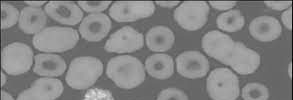


 Original Image
1 227 



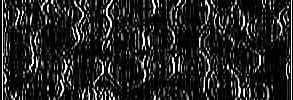


 SobelX output
-3057.0 5188.0 



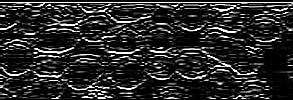


 SobelY output
-3133.0 1976.0 



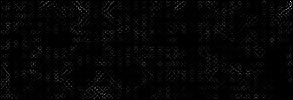


 SobelXY output
-363.0 229.0 



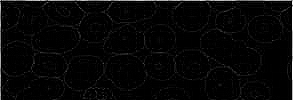


 Laplacian output
-221.0 339.0 



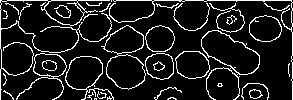


 Cany output
0 255 



In [152]:
cv2_imshow(gray_image)
print('\n Original Image')
print(gray_image.min(), gray_image.max(),'\n')

cv2_imshow(sobelx)
print('\n SobelX output')
print(sobelx.min(), sobelx.max(),'\n')

cv2_imshow(sobely)
print('\n SobelY output')
print(sobely.min(), sobely.max(),'\n')

cv2_imshow(sobelxy)
print('\n SobelXY output')
print(sobelxy.min(), sobelxy.max(),'\n')

cv2_imshow(laplacian)
print('\n Laplacian output')
print(laplacian.min(), laplacian.max(),'\n')

cv2_imshow(cany)
print('\n Cany output')
print(cany.min(), cany.max(),'\n')

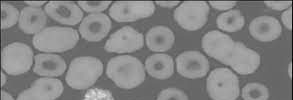

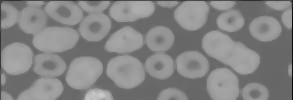

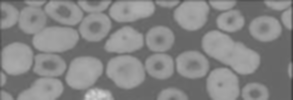

In [141]:
medblr = cv2.medianBlur(gray_image,5)
gsnblr = cv2.GaussianBlur(gray_image, (5,5), 1, 1)

cv2_imshow(gray_image)
cv2_imshow(medblr)
cv2_imshow(gsnblr)